# Figure generation


<br>

    Code written by:    Sarah Kemp  
                        sarahannekemp@gmail.com                      
                        December 2023 
                    
This notebook generates the figures produced in DOI: ### 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches

In [2]:
#########################
## load the data 
#########################

workdir = 'C:/Users/sarah/OneDrive - University of Tasmania/projects/ahead/data/tux11/Dwi/cook_distance_removed/'

# load dataframes 
d_ifg_pre = pd.read_csv(workdir + 'dwi-ifg-pre.csv')
d_stn_ifg = pd.read_csv(workdir + 'dwi-stn-ifg.csv')
d_stn_pre = pd.read_csv(workdir + 'dwi-stn-pre.csv')

# let's put the existing dataframes together 
combine = pd.merge(d_ifg_pre, d_stn_ifg, on=['subjectID', 'ROI'], how= 'outer') 
dwi = pd.merge(combine, d_stn_pre, on=['subjectID', 'ROI'], how='outer')

# combine all the columns since they're stretched now 
dwi['age'] = dwi['age_x'].combine_first(dwi['age_y']).combine_first(dwi['age'])
dwi['fa'] = dwi['fa_x'].combine_first(dwi['fa_y']).combine_first(dwi['fa'])
dwi['adc'] = dwi['md_x'].combine_first(dwi['md_y']).combine_first(dwi['md'])

# remove the oldest person  
dwi = dwi[dwi['age'] < 80]
dwi = dwi.drop(columns=['fa_x', 'md_x', 'age_x', 'fa_y', 'md_y', 'age_y', 'md'])

dwi.to_csv(workdir + '/combined_dfs_for_figures/diffusion.csv', index=False)


In [7]:
# now do qmri  
q_ifg_pre = pd.read_csv(workdir + 'q-ifg-pre.csv')
q_stn_ifg = pd.read_csv(workdir + 'q-stn-ifg.csv')
q_stn_pre = pd.read_csv(workdir + 'q-stn-pre.csv')

# let's put the existing dataframes together 
combine = pd.merge(q_ifg_pre, q_stn_ifg, on=['subjectID', 'ROI'], how= 'outer') 
qmri = pd.merge(combine, q_stn_pre, on=['subjectID', 'ROI'], how='outer')

# combine all the columns since they're stretched now 
qmri['age'] = qmri['age_x'].combine_first(qmri['age_y']).combine_first(qmri['age'])
qmri['iron'] = qmri['iron_x'].combine_first(qmri['iron_y']).combine_first(qmri['iron'])
qmri['myelin'] = qmri['myelin_x'].combine_first(qmri['myelin_y']).combine_first(qmri['myelin'])

qmri = qmri[qmri['age'] < 80]
qmri = qmri.drop(columns=['iron_x', 'myelin_x', 'age_x', 'iron_y', 'myelin_y', 'age_y'])

# original iron values are in mg/100g tissue which is a sucky y axis value - multiplying by 10 to make it ppm 
qmri['iron_ppm'] = qmri['iron']*10

qmri.to_csv(workdir + '/combined_dfs_for_figures/qmri_tracts.csv', index=False)

qmri

,subjectID,ROI,iron,myelin,age,iron_ppm
0,sub-001,IFG-preSMA,5.157530,11.00200,26.0,51.57530
1,sub-006,IFG-preSMA,4.886500,11.85770,27.0,48.86500
2,sub-008,IFG-preSMA,4.711750,11.51995,22.0,47.11750
3,sub-009,IFG-preSMA,6.536610,11.79215,68.0,65.36610
4,sub-010,IFG-preSMA,4.579915,13.58455,41.0,45.79915
...,...,...,...,...,...,...
136,sub-089,STN-preSMA,5.689115,14.90655,50.0,56.89115
137,sub-090,STN-preSMA,6.074935,13.71885,39.0,60.74935
138,sub-091,STN-preSMA,5.413610,13.40805,45.0,54.13610
139,sub-095,STN-preSMA,5.533465,14.52010,34.0,55.33465


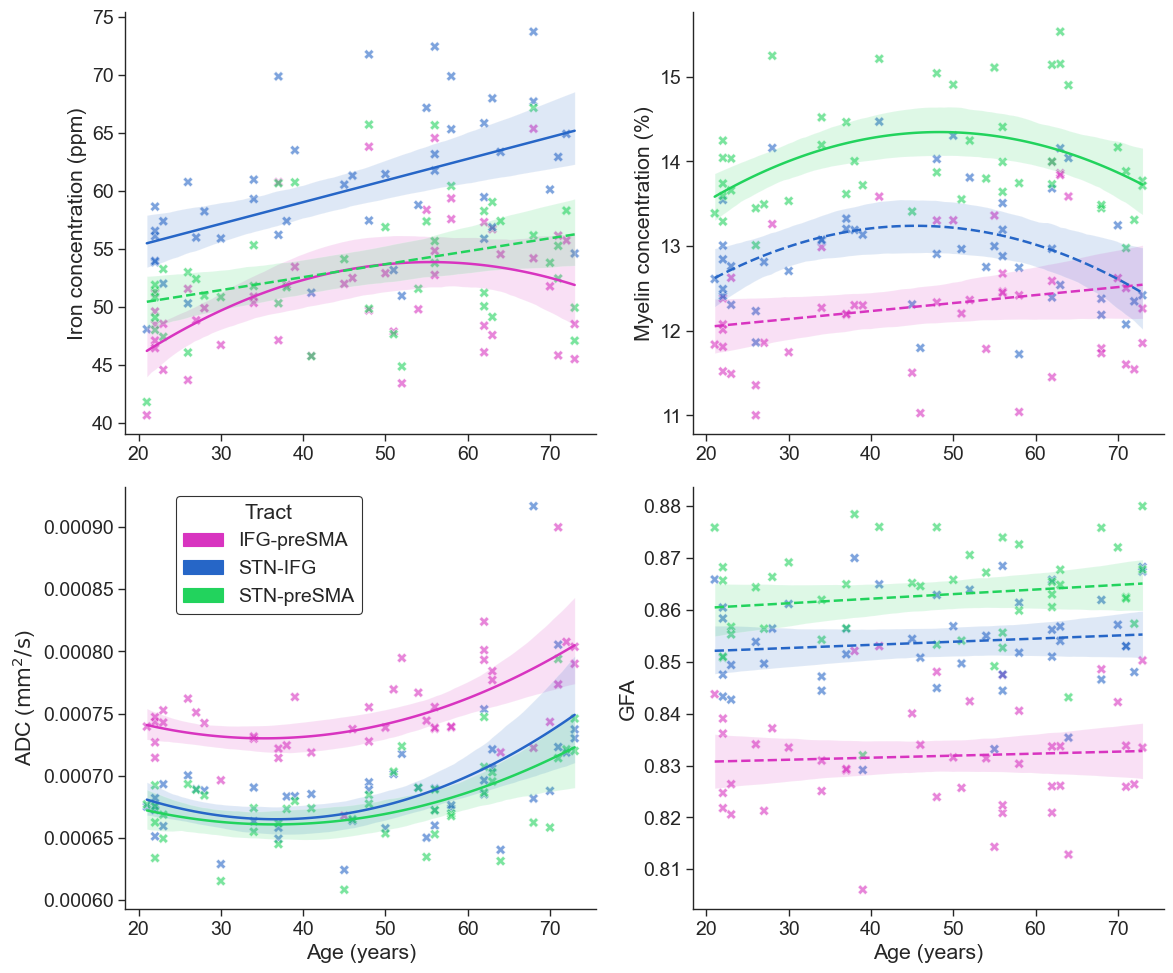

In [18]:
#########################

### FIGURE 4 

### winning models of the age-related changes in the tracts 

#########################


sns.set_theme(context='paper', font_scale=1.6, style='ticks') 

#seaborn.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None

fig, [[ax0, ax1], [ax2, ax3]] = plt.subplots(2, 2, figsize=(12, 10))


# custom colours to use throughout 
colours = {
    'IFG-preSMA': '#d834c0',
    'STN-IFG': '#2666C7',
    'STN-preSMA': '#22d35d'
}


####################################
######### draw each category and its line of best fit 
####################################


######### IRON - TOP LEFT #########

# specify why kind of line of best fit is required (based on winning model)
lines_bestfit = {
    'IFG-preSMA': 2,
    'STN-IFG': 1,
    'STN-preSMA': 1}

# specify what kind of lines to draw 
line_type = {
    'IFG-preSMA': '-',
    'STN-IFG': '-',
    'STN-preSMA': '--'}

# do the scatter plots 


sns.scatterplot(ax=ax0, x='age', y='iron_ppm', data=qmri, hue='ROI', palette=colours, marker='X', alpha=0.6, s=50)

# add the line of best fit 
for roi in qmri['ROI'].unique():
    subset = qmri[qmri['ROI'] == roi]
    sns.regplot(ax=ax0, x='age', y='iron_ppm', data=subset, scatter=False, 
                color=colours[roi], order=lines_bestfit[roi],
               line_kws={'linestyle': line_type[roi]})

ax0.set_ylabel('Iron concentration (ppm)')



######### MYELIN - TOP RIGHT #########
lines_bestfit = {
    'IFG-preSMA': 1,
    'STN-IFG': 2,
    'STN-preSMA': 2}

line_type = {
    'IFG-preSMA': '--',
    'STN-IFG': '--',
    'STN-preSMA': '-'}

sns.scatterplot(ax=ax1, x='age', y='myelin', data=qmri, hue='ROI', palette=colours, marker='X', alpha=0.6, s=50)

for roi in qmri['ROI'].unique():
    subset = qmri[qmri['ROI'] == roi]
    sns.regplot(ax=ax1, x='age', y='myelin', data=subset, scatter=False, 
                color=colours[roi], order=lines_bestfit[roi],
                line_kws={'linestyle': line_type[roi]})

ax1.set_ylabel('Myelin concentration (%)')



######### ADC - BOTTOM LEFT #########
# all the lines of best fit are second order 

sns.scatterplot(ax=ax2, x='age', y='adc', data=dwi, hue='ROI', palette=colours, marker='X', alpha=0.6, s=50)

for roi in dwi['ROI'].unique():
    subset = dwi[dwi['ROI'] == roi]
    sns.regplot(ax=ax2, x='age', y='adc', data=subset, scatter=False,  
                color=colours[roi], order=2)

ax2.set_ylabel(r'ADC ($\text{mm}^2/\text{s}$)')


######### GFA - BOTTOM RIGHT #########
# all the lines of best fit are first order 

sns.scatterplot(ax=ax3, x='age', y='fa', data=dwi, hue='ROI', palette=colours, marker='X', alpha=0.6, s=50)

for roi in dwi['ROI'].unique():
    subset = dwi[dwi['ROI'] == roi]
    sns.regplot(ax=ax3, x='age', y='fa', data=subset, scatter=False,  
                color=colours[roi], order=1, 
                line_kws={'linestyle': '--'})

ax3.set_ylabel('GFA')



# set stuff that's the same throughout
for ax in [ax0, ax1]:
    ax.set_xlabel('')
    ax.legend_.remove()



for ax in [ax2, ax3]:
    ax.set_xlabel('Age (years)')
    ax.legend_.remove()


plt.tight_layout()

######### LEGEND #########
patchList = []
legend_colours = { 'IFG-preSMA' : '#d834c0', 
               'STN-IFG' : '#2666C7', 
               'STN-preSMA' : '#22d35d' }

for key in legend_colours:
        data_key = mpatches.Patch(color=legend_colours[key], label=key)
        patchList.append(data_key)

plt.legend(handles=patchList, loc=[-1.1,0.7], title="Tract", edgecolor='black')


sns.despine()

plt.savefig('C:/Users/sarah/OneDrive - University of Tasmania/projects/ahead/figures/results_tracts.pdf', 
            format="pdf", dpi=800,bbox_inches="tight")


plt.show()

